## ‰ΩúÊ•≠ÂÖ≠

In [ ]:
import pandas
finance = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/finance_article.xlsx')

In [ ]:
finance.head()

url  ...    tag
0  https://www.ptt.cc/bbs/Loan/M.1586506724.A.914...  ...   Loan
1  https://www.ptt.cc/bbs/Loan/M.1586449508.A.618...  ...   Loan
2  https://www.ptt.cc/bbs/Stock/M.1586573726.A.DB...  ...  Stock
3  https://www.ptt.cc/bbs/Stock/M.1586582519.A.AE...  ...  Stock
4  https://www.ptt.cc/bbs/Stock/M.1586572758.A.8B...  ...  Stock

[5 rows x 4 columns]

In [ ]:
import jieba
corpus = []
tags = []
for idx, rec in finance.iterrows():
  corpus.append(' '.join(jieba.cut(rec['content'])))
  tags.append(rec['tag'])

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.959 seconds.
Prefix dict has been built successfully.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [ ]:
X = tfidf
y = tags

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(train_x, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [ ]:
pred_y = clf.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
print(clf.classes_)
confusion_matrix(test_y, pred_y)

['Loan' 'Stock' 'creditcard']


array([[24,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 19]])

## Yahoo Â•áÊë©Áà¨Ëü≤

In [ ]:
import requests
res = requests.get('https://movies.yahoo.com.tw/movieinfo_review.html/id=8779?sort=update_ts&order=desc&page=2')


In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [ ]:
#soup

In [ ]:
movie_ary = []
for li in soup.select('.usercom_list li'):
  stars = li.select_one('input[name=score]').get('value')
  comments = li.select('span')[2].text
  movie_ary.append({'comments':comments, 'stars':stars})
  #print('====================')

In [ ]:
import pandas
moviedf = pandas.DataFrame(movie_ary)

In [ ]:
moviedf

comments stars
0         ÁÇ∫ÊãçËÄåÊãç ÂÖ®ÊØÄ Èù¢ÁõÆÂÖ®Èùû Â•≥‰∏ªÈÅ∏ËßíÈÅ∏ÊàêÈÄôÊ®£ÊàëÂ∑≤Á∂ìÂøçËëóÊéèÈå¢Âá∫‰æÜÁúã ÁµêÊûúÊï¥È´î‰πüÊòØÁàõÁöÑ‰∏ÄÂåπ     1
1                             ÊôÆÊôÆ ÁúãÂà∞ÊÉ≥Áù°Ë¶∫ ÂäáÊÉÖÊµÅÊö¢ ‰ΩÜÁúãÂÆå‰∏çÊòØÂæàÈÅéÁôÆ     3
2                             ÊØîÂæ©‰ªáËÄÖËÅØÁõü4~Â•ΩÁúãÂ§™Â§ö!È©öÂ•áÈöäÈï∑~Â•ΩÁúã~Êé®     5
3  https://www.facebook.com/profile.php?id=100028...     5
4                            ÊØîÈ†êÊúüÂ•ΩÁúãÔºåÂπæÈÉ®Ëã±ÈõÑÁ≥ªÂàóÈõªÂΩ±Ë£°Ë¶∫ÂæóÂæàÊé®Ëñ¶ÁöÑ‰∏ÄÈÉ®     4
5                               ÁúãÁâáÊâæÊàë www.gamedisc.cc     5
6                  Ê≤íÊúâÊÉ≥ÂÉè‰∏≠Â•ΩÁúãÔºå‰ΩÜ‰∫§‰ª£‰∫Ü‰∏Ä‰∫õ‰ª•ÂâçÂæ©‰ªáËÄÖËÅØÁõüÁ≥ªÂàóÊ≤íÊúâÁöÑÁ¥∞ÁØÄÔºåÁ∏ΩÈ´îÈÇÑË°å     4
7                                  ÁúüÊòØÂæà‰πèÂë≥ÁÑ°Ë∂£ÁöÑ‰∏ÄÈÉ®Êà≤.Ë∂ÖÁ¥öÂ§±Êúõ~     1
8                       Â•≥ËßíÁµ¶1Êòü„ÄÇÂÖ∂ÂÆÉ‰∏çÊòØÂæàÊúâË∂£„ÄÇ\r\nÂÖßÂÆπÈÅ©ÂêàÂúã‰∏≠Â∞èÂ≠∏Áîü„ÄÇ     1
9                                    Â∞çÂ•≥Ë∂Ö‰∫∫ÁÑ°ÊäµÊäóÔΩûÊ≠£Â¶πÔºÅÂäõÊå∫ÂìàÂìà     4

In [ ]:
def convertRate(stars):
  if int(stars) >= 4:
    return 'good'
  elif int(stars) == 3:
    return 'soso'
  else:
    return 'bad'

In [ ]:
moviedf['status'] = moviedf['stars'].map(convertRate)

In [ ]:
moviedf

comments stars status
0         ÁÇ∫ÊãçËÄåÊãç ÂÖ®ÊØÄ Èù¢ÁõÆÂÖ®Èùû Â•≥‰∏ªÈÅ∏ËßíÈÅ∏ÊàêÈÄôÊ®£ÊàëÂ∑≤Á∂ìÂøçËëóÊéèÈå¢Âá∫‰æÜÁúã ÁµêÊûúÊï¥È´î‰πüÊòØÁàõÁöÑ‰∏ÄÂåπ     1    bad
1                             ÊôÆÊôÆ ÁúãÂà∞ÊÉ≥Áù°Ë¶∫ ÂäáÊÉÖÊµÅÊö¢ ‰ΩÜÁúãÂÆå‰∏çÊòØÂæàÈÅéÁôÆ     3   soso
2                             ÊØîÂæ©‰ªáËÄÖËÅØÁõü4~Â•ΩÁúãÂ§™Â§ö!È©öÂ•áÈöäÈï∑~Â•ΩÁúã~Êé®     5   good
3  https://www.facebook.com/profile.php?id=100028...     5   good
4                            ÊØîÈ†êÊúüÂ•ΩÁúãÔºåÂπæÈÉ®Ëã±ÈõÑÁ≥ªÂàóÈõªÂΩ±Ë£°Ë¶∫ÂæóÂæàÊé®Ëñ¶ÁöÑ‰∏ÄÈÉ®     4   good
5                               ÁúãÁâáÊâæÊàë www.gamedisc.cc     5   good
6                  Ê≤íÊúâÊÉ≥ÂÉè‰∏≠Â•ΩÁúãÔºå‰ΩÜ‰∫§‰ª£‰∫Ü‰∏Ä‰∫õ‰ª•ÂâçÂæ©‰ªáËÄÖËÅØÁõüÁ≥ªÂàóÊ≤íÊúâÁöÑÁ¥∞ÁØÄÔºåÁ∏ΩÈ´îÈÇÑË°å     4   good
7                                  ÁúüÊòØÂæà‰πèÂë≥ÁÑ°Ë∂£ÁöÑ‰∏ÄÈÉ®Êà≤.Ë∂ÖÁ¥öÂ§±Êúõ~     1    bad
8                       Â•≥ËßíÁµ¶1Êòü„ÄÇÂÖ∂ÂÆÉ‰∏çÊòØÂæàÊúâË∂£„ÄÇ\r\nÂÖßÂÆπÈÅ©ÂêàÂúã‰∏≠Â∞èÂ≠∏Áîü„ÄÇ     1    bad
9                                    Â∞çÂ•≥Ë∂Ö‰∫∫ÁÑ°ÊäµÊäóÔΩûÊ≠£Â¶πÔºÅÂäõÊå∫ÂìàÂìà     4   good

In [ ]:
import pandas
movies  = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/yahoo_movie.xlsx', index_col = 0)
movies.head()

content  stars title status
0  ‰∏çÁü•ÈÅìËÄ∂! ÁúãÂÆåÊï¥ÂÄãÁÑ°ÊÑü\r\nÊúâÁ®ÆË¶∫ÂæóÂ∞±ÊòØÂ•≥ÂÖí"Áµ¶Ëï≠"ÂÆ≥Ê≠ª‰∫ÜËÄÅÁà∏\r\nÁÑ∂Âæå...Êó¢ÁÑ∂ÂèØ‰ª•...      3  Âè§Â¢ìÂ•áÂÖµ   soso
1  ÂæàÂ•ΩÁúãÁöÑÂãï‰ΩúÁâáÔºå‰∏çÊúÉÊµ™Ë≤ªÈå¢Ë∑üÊôÇÈñì„ÄÇÂæà‰πÖÊ≤íÊúâÈÄôÊ®£ÁöÑÊé¢Èö™Áâá„ÄÇÂèØË™™ÊòØÂ•≥ÁâàÁöÑÂç∞Á¨¨ÂÆâÈÇ£Áìä„ÄÇÂ•≥‰∏ªËßíË∑üÁà∏Áà∏...      5  Âè§Â¢ìÂ•áÂÖµ   good
2  Ë™™ÈÄôÂÄã‰∏çÂ•ΩÁúãÁöÑË©±ÔºåÈÇ£ÊàëÈÇÑÁúü‰∏çÁü•ÈÅìÔºåÈÇÑÊúâ‰ªÄÈ∫ºÁâáÊòØÊÇ®ÂèØ‰ª•ÂéªÁúãÂæó‰∫Ü„ÄÇÈõªÂΩ±Â•ΩÁúãÔºå‰ΩÜË©±Ë™™ÁæÖÊãâÊúâË£ùÂèØ‰ª•Êíø...      5  Âè§Â¢ìÂ•áÂÖµ   good
3                                   Áà∂Â•≥ÈáçÈÄ¢ÁúüÁöÑÂæàËÆì‰∫∫ÊÑüÂãïÔºå‰∫îÈ°ÜÊòü„ÄÇ      5  Âè§Â¢ìÂ•áÂÖµ   good
4  ÂäáÊÉÖÈõñÁÑ∂ËÄÅÂ•óÔºå‰ΩÜ‰ªçÊãçÂá∫Êñ∞ÊÑèÔºåÂè§Â¢ìËÉΩÊÆ∫‰∫∫ÁöÑÊñπÂºè‰∏çÂ∞±ÊòØÊ©üÈóúÂíåÊØíÔºåË¶ÅÊ±Ç‰∫Ç‰∏ÉÂÖ´Á≥üÁöÑËßÄÁúæÔºå‰Ω†ÁúãÂñ™Â∞∏ÁâáÁúãÂ§ö‰∫Ü„ÄÇ      4  Âè§Â¢ìÂ•áÂÖµ   good

In [ ]:
movies['title'].value_counts()

ÊúÄÁµÇÈ®éÂ£´       452
Â•ßÂâµÁ¥ÄÂÖÉ       281
ÊîªÊÆºÊ©üÂãïÈöä      173
ÊúÄÂæåÁöÑÁµïÂú∞Ê≠¶Â£´    117
Âè§Â¢ìÂ•áÂÖµ        89
Name: title, dtype: int64

In [ ]:
import jieba
corpus = []
tags = []
for idx, rec in movies[movies['status'].isin(['good', 'bad'])].iterrows():
  corpus.append(' '.join(jieba.cut(rec.get('content'))))
  tags.append(rec.get('status'))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=['ÈùûÂ∏∏','Êúâ‰∫õ','ÈõñÁÑ∂', '‰∏çÈÅé', 'Âè™Êúâ'])
X = vectorizer.fit_transform(corpus)
X

<980x5895 sparse matrix of type '<class 'numpy.float64'>'
	with 16688 stored elements in Compressed Sparse Row format>

In [ ]:
y = tags

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.3, random_state =42)

In [ ]:
train_X.shape

(686, 5895)

In [ ]:
test_X.shape

(294, 5895)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.01)
clf.fit(train_X, train_Y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [ ]:
predicted = clf.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_Y, predicted)

0.7619047619047619

In [ ]:
print(clf.classes_)
confusion_matrix(test_Y, predicted)

['bad' 'good']


array([[ 83,  34],
       [ 36, 141]])

In [ ]:
clf.feature_count_.shape

(2, 5895)

In [ ]:
#vectorizer.get_feature_names()

In [ ]:
features_ary = []
for word, bad_count, good_count in zip(vectorizer.get_feature_names(), clf.feature_count_[0], clf.feature_count_[1]):
  dic = {}
  dic['good_ratio'] = good_count/(bad_count + 1)
  dic['bad_ratio'] = bad_count / (good_count + 1)
  dic['good_cnt'] = good_count
  dic['bad_cnt'] = bad_count
  dic['word'] = word
  features_ary.append(dic)

In [ ]:
import pandas
features_df = pandas.DataFrame(features_ary)

In [ ]:
features_df.sort_values('good_ratio', ascending=False).head(10)

good_ratio  bad_ratio   good_cnt   bad_cnt word
1996    4.873862   0.168605  31.953941  5.556185   Â•ΩÁúã
5384    4.854489   0.035449   6.071400  0.250677  ÈÇÑ‰∏çÈåØ
682     4.430181   0.070953   6.919589  0.561920   ‰∏çÈåØ
2263    2.987988   0.000000   2.987988  0.000000   Â∏åÊúõ
3836    2.633506   0.179567   5.893257  1.237799   ÁàΩÁâá
1254    2.536724   0.100133   3.740975  0.474727   Âà∫ÊøÄ
1850    2.408689   0.137764   4.101539  0.702810   Â§ßÂÆ∂
2590    2.319872   0.000000   2.319872  0.000000   ÊÑüÂãï
914     2.179995   0.155255   3.806926  0.746300   ‰ΩÜÊòØ
1135    2.172291   0.138958   3.543905  0.631413   ÂÖ∂ÂØ¶

In [ ]:
features_df.sort_values('bad_ratio', ascending=False).head(10)

good_ratio  bad_ratio  good_cnt    bad_cnt word
4204    0.036470   5.473130  0.294949   7.087424   Áù°Ëëó
3606    0.039703   4.792868  0.284045   6.154257   Êµ™Ë≤ª
4113    0.184471   3.658543  2.643348  13.329343   ÁúãÂà∞
4206    0.013387   3.540975  0.063817   3.766948   Áù°Ë¶∫
3667    0.000000   3.219715  0.000000   3.219715  Êºî‰ªÄÈ∫º
1938    0.148842   3.200874  1.194218   7.023414   Â§±Êúõ
3822    0.058056   2.630249  0.248742   3.284501   ÁàõÁâá
1871    0.040038   2.584796  0.160096   2.998612  Â§ßÁàõÁâá
4323    0.059520   2.496003  0.244388   3.105997  Á¨¨‰∏ÄÊ¨°
1487    0.139935   2.492822  0.750607   4.363952   Âè™Êúâ

In [ ]:
s = 'ÁúüÊòØÂæà‰πèÂë≥ÁÑ°Ë∂£ÁöÑ‰∏ÄÈÉ®Êà≤.Ë∂ÖÁ¥öÂ§±Êúõ~'
s_seg = ' '.join(jieba.cut(s))
s_vec = vectorizer.transform([s_seg])

In [ ]:
clf.predict(s_vec)

array(['bad'], dtype='<U4')

## Support Vector Machine

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[0:100,[2,3]]
y = iris.target[0:100]


In [ ]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.svm import SVC
clf1 = SVC(kernel = 'linear')
clf1.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()




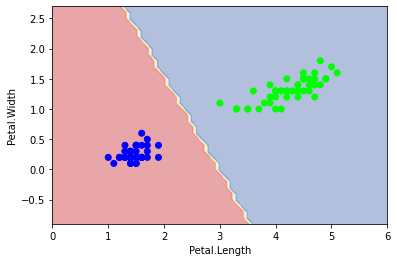

In [ ]:
 plot_estimator(clf1, X, y) 

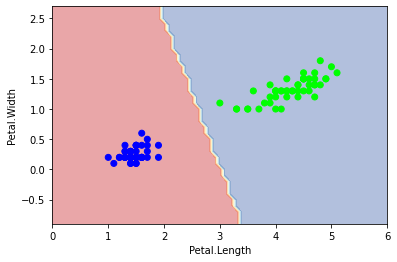

In [ ]:
 plot_estimator(clf2, X, y) 

In [ ]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-0.4,0.5,1],[2,5,1]])
X = data[:, :2] 
Y = data[:,2]


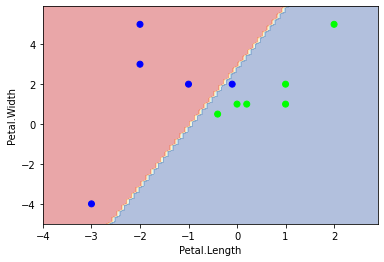

In [ ]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)


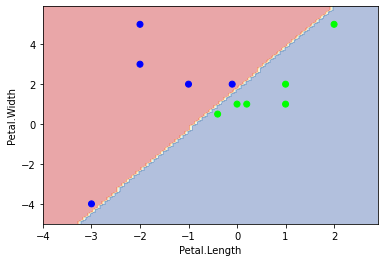

In [ ]:
clf = SVC(C=100000, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)


In [ ]:
iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target


In [ ]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

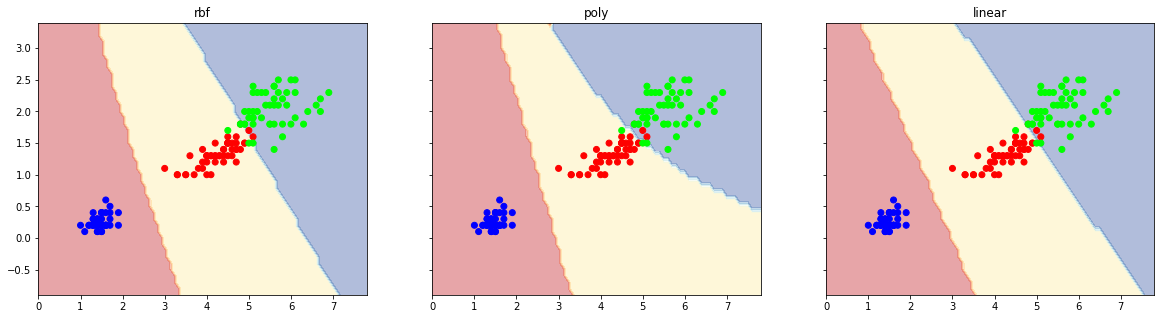

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y,  cmap = plt.cm.brg)
    axarr[idx].set_title(title)


## Âª∫Á´ãÊîØÊåÅÂêëÈáèÊ©ü‰ª•ÂàÜÈ°ûÊÉÖÁ∑í

In [ ]:
import pandas
movies  = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/yahoo_movie.xlsx', index_col = 0)
movies.head()

content  stars title status
0  ‰∏çÁü•ÈÅìËÄ∂! ÁúãÂÆåÊï¥ÂÄãÁÑ°ÊÑü\r\nÊúâÁ®ÆË¶∫ÂæóÂ∞±ÊòØÂ•≥ÂÖí"Áµ¶Ëï≠"ÂÆ≥Ê≠ª‰∫ÜËÄÅÁà∏\r\nÁÑ∂Âæå...Êó¢ÁÑ∂ÂèØ‰ª•...      3  Âè§Â¢ìÂ•áÂÖµ   soso
1  ÂæàÂ•ΩÁúãÁöÑÂãï‰ΩúÁâáÔºå‰∏çÊúÉÊµ™Ë≤ªÈå¢Ë∑üÊôÇÈñì„ÄÇÂæà‰πÖÊ≤íÊúâÈÄôÊ®£ÁöÑÊé¢Èö™Áâá„ÄÇÂèØË™™ÊòØÂ•≥ÁâàÁöÑÂç∞Á¨¨ÂÆâÈÇ£Áìä„ÄÇÂ•≥‰∏ªËßíË∑üÁà∏Áà∏...      5  Âè§Â¢ìÂ•áÂÖµ   good
2  Ë™™ÈÄôÂÄã‰∏çÂ•ΩÁúãÁöÑË©±ÔºåÈÇ£ÊàëÈÇÑÁúü‰∏çÁü•ÈÅìÔºåÈÇÑÊúâ‰ªÄÈ∫ºÁâáÊòØÊÇ®ÂèØ‰ª•ÂéªÁúãÂæó‰∫Ü„ÄÇÈõªÂΩ±Â•ΩÁúãÔºå‰ΩÜË©±Ë™™ÁæÖÊãâÊúâË£ùÂèØ‰ª•Êíø...      5  Âè§Â¢ìÂ•áÂÖµ   good
3                                   Áà∂Â•≥ÈáçÈÄ¢ÁúüÁöÑÂæàËÆì‰∫∫ÊÑüÂãïÔºå‰∫îÈ°ÜÊòü„ÄÇ      5  Âè§Â¢ìÂ•áÂÖµ   good
4  ÂäáÊÉÖÈõñÁÑ∂ËÄÅÂ•óÔºå‰ΩÜ‰ªçÊãçÂá∫Êñ∞ÊÑèÔºåÂè§Â¢ìËÉΩÊÆ∫‰∫∫ÁöÑÊñπÂºè‰∏çÂ∞±ÊòØÊ©üÈóúÂíåÊØíÔºåË¶ÅÊ±Ç‰∫Ç‰∏ÉÂÖ´Á≥üÁöÑËßÄÁúæÔºå‰Ω†ÁúãÂñ™Â∞∏ÁâáÁúãÂ§ö‰∫Ü„ÄÇ      4  Âè§Â¢ìÂ•áÂÖµ   good

In [ ]:
import jieba
corpus = []
tags = []
for idx, rec in movies[movies['status'].isin(['good', 'bad'])].iterrows():
  corpus.append(' '.join(jieba.cut(rec.get('content'))))
  tags.append(rec.get('status'))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)

In [ ]:
X = tfidf
y = tags

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(train_X, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_y = clf.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, pred_y)

0.8197278911564626

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_y)

array([[ 84,  33],
       [ 20, 157]])

In [ ]:
s = 'Â•ΩÁúã ÊØîÂâç‰∏ÄÈõÜÂ≠îÂäâÊºîÁöÑÊõ¥Á≤æÂΩ© Âõ†Ê≠§ÁâáÊ¨£Ë≥ûÁî∑‰∏ªËßí üòÇ'
s_seg = ' '.join(jieba.cut(s))
s_vec = vectorizer.transform([s_seg])

In [ ]:
s_vec

<1x5900 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
clf.predict(s_vec)

array(['good'], dtype='<U4')

## Model Persistence
- https://scikit-learn.org/stable/modules/model_persistence.html

In [ ]:
import pickle
s = pickle.dumps(clf)

In [ ]:
with open('svm_model.pickle', 'wb') as f:
  f.write(s)

In [ ]:
clf2 = pickle.load(open('svm_model.pickle','rb') )

In [ ]:
clf2.predict(s_vec)

array(['good'], dtype='<U4')

In [ ]:
with open('vectorizer.pickle', 'wb') as f:
  f.write(pickle.dumps(vectorizer))

In [ ]:
vectorizer2 = pickle.load(open('vectorizer.pickle','rb') )

In [ ]:
import pickle
import jieba
vectorizer2 = pickle.load(open('vectorizer.pickle','rb') )
clf2 = pickle.load(open('svm_model.pickle','rb') )

def sentiment_analysis(s):
  s_seg = ' '.join(jieba.cut(s))
  s_vec = vectorizer2.transform([s_seg])
  return clf2.predict(s_vec)[0]


In [ ]:
sentiment_analysis('Â•ΩÁúã ÊØîÂâç‰∏ÄÈõÜÂ≠îÂäâÊºîÁöÑÊõ¥Á≤æÂΩ© Âõ†Ê≠§ÁâáÊ¨£Ë≥ûÁî∑‰∏ªËßí üòÇ')

'good'

In [ ]:
sentiment_analysis('Â§ßÁàõÁâáÔºåÁúãÂà∞ÈÄôÂÄãÁâáÊàë‰∏ÄÁõ¥Áù°Ë¶∫')

'bad'

## SVM Ë™øÂèÉ

In [132]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [134]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC()
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
search = GridSearchCV(clf, param_grid, cv=5)
search.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [137]:
print("Test set score:{:.2f}".format(search.score(X,y))) 
print("Best parameters:{}".format(search.best_params_)) 
print("Best score on train set:{:.2f}".format(search.best_score_))


Test set score:0.99
Best parameters:{'C': 1, 'kernel': 'linear'}
Best score on train set:0.98
